# Multi-Layer Perceptron with MNIST

## 1. Import Packages

In [1]:
import input_data
import numpy as np
import matplotlib.pylab as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
from tensorflow import keras

Using TensorFlow backend.


## 2. Explore MNIST Data

In [3]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)  # MNIST 데이터를 불러와서 저장

Extracting ./mnist_data\train-images-idx3-ubyte.gz
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz


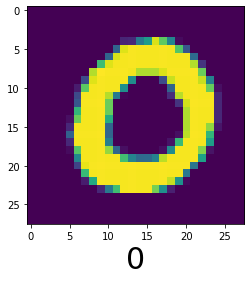

In [4]:
#  Example of a picture
pic,real_values = mnist_images.train.next_batch(25)   

index = 11   # 0~24 integer
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.xlabel(real_values[index], fontsize=30)
plt.show()

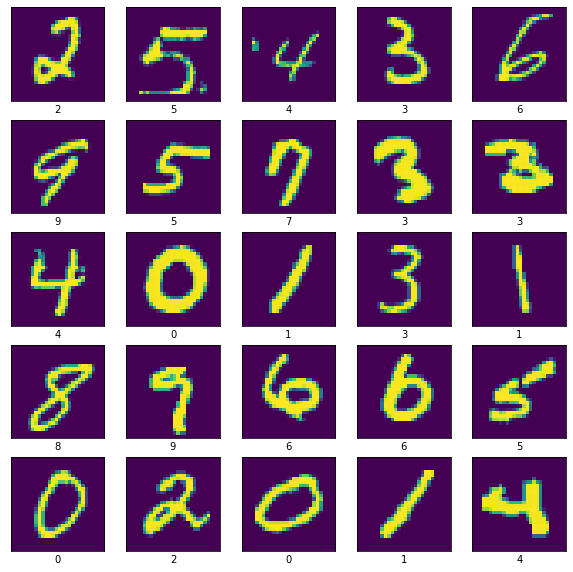

In [5]:
# Explore MNIST data

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(pic[i,:] , [28,28])
    plt.imshow(image)
    plt.xlabel(real_values[i])
plt.show()

## 3. Make Dataset

In [6]:
# Download Data : http://yann.lecun.com/exdb/mnist/
# Data input script : https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot = False)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
print("the number of train examples :" , mnist.train.num_examples)
print("the number of test examples :" , mnist.test.num_examples)

the number of train examples : 55000
the number of test examples : 10000


In [8]:
x_train_orig = mnist.train.images.reshape((55000, 28 * 28))
x_test_orig = mnist.test.images.reshape((10000, 28 * 28))

In [9]:
# Normalization
x_train = x_train_orig.astype('float32') / 255
x_test = x_test_orig.astype('float32') / 255

y_train = mnist.train.labels
y_test = mnist.test.labels

## 4. Multi-Layer Perceptron

In [10]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=150, batch_size=128, verbose = 2)

Epoch 1/150
 - 3s - loss: 0.4009 - accuracy: 0.8915
Epoch 2/150
 - 3s - loss: 0.3533 - accuracy: 0.9020
Epoch 3/150
 - 3s - loss: 0.3277 - accuracy: 0.9070
Epoch 4/150
 - 3s - loss: 0.3103 - accuracy: 0.9119
Epoch 5/150
 - 3s - loss: 0.2968 - accuracy: 0.9146
Epoch 6/150
 - 3s - loss: 0.2860 - accuracy: 0.9175
Epoch 7/150
 - 3s - loss: 0.2760 - accuracy: 0.9206
Epoch 8/150
 - 3s - loss: 0.2676 - accuracy: 0.9232
Epoch 9/150
 - 3s - loss: 0.2585 - accuracy: 0.9258
Epoch 10/150
 - 3s - loss: 0.2504 - accuracy: 0.9285
Epoch 11/150
 - 3s - loss: 0.2424 - accuracy: 0.9303
Epoch 12/150
 - 3s - loss: 0.2338 - accuracy: 0.9330
Epoch 13/150
 - 3s - loss: 0.2256 - accuracy: 0.9349
Epoch 14/150
 - 3s - loss: 0.2182 - accuracy: 0.9375
Epoch 15/150
 - 3s - loss: 0.2099 - accuracy: 0.9400
Epoch 16/150
 - 3s - loss: 0.2023 - accuracy: 0.9420
Epoch 17/150
 - 3s - loss: 0.1946 - accuracy: 0.9439
Epoch 18/150
 - 3s - loss: 0.1878 - accuracy: 0.9464
Epoch 19/150
 - 3s - loss: 0.1808 - accuracy: 0.9481
Ep

## 5. Accuracy Analysis

In [15]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)

Train Accuracy: 0.999890923500061
Test Accuracy: 0.9801999926567078


## 6. Check a prediction

In [16]:
predictions = model.predict(x_test)  #confidence

In [17]:
predictions[0] # confidence of first image in test set

array([5.9668326e-10, 1.6767920e-12, 3.2551486e-07, 2.4127810e-04,
       5.9777114e-14, 5.3639587e-10, 5.3229026e-19, 9.9975675e-01,
       6.7135872e-08, 1.6300487e-06], dtype=float32)

7


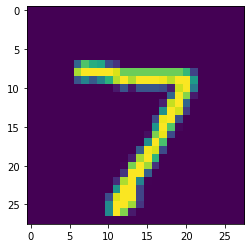

In [18]:
print(np.argmax(predictions[0]))  # highest confidence
# This model is convinced that this image is "7"

image = x_test[0,:]
image = np.reshape(image,[28,28])
plt.imshow(image)

## 7. Save model

In [19]:
# Save model
model_json = model.to_json()
with open("mlp.json", "w") as json_file : 
    json_file.write(model_json)
    
# Save model weights
model.save_weights("mlp_weight.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
# Load trained model
from keras.models import model_from_json 
json_file = open("mlp.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("mlp_weight.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
# evaluate
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_score = loaded_model.evaluate(x_train, y_train, verbose=0)
test_score = loaded_model.evaluate(x_test, y_test, verbose=0)
 
print('training accuracy : ' + str(train_score[1]))
print('test accuracy : ' + str(test_score[1]))

training accuracy : 0.999890923500061
test accuracy : 0.9801999926567078
